In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/outs/net.txt", sep=" ")

In [3]:
df.head()

,pos,value,chr,reads,strand
0,156,0.481988,1,1,+
1,5793,0.481988,1,1,+
2,5871,0.481988,1,1,+
3,5883,0.481988,1,1,+
4,5889,0.481988,1,1,+


In [4]:
df2 = df.groupby(["chr", "pos"]).sum("reads")

In [5]:
df2.head()

value  reads
chr pos                  
1   156   0.481988      1
    3378  0.481988      1
    3388  0.481988      1
    3398  0.481988      1
    3429  0.481988      1

In [6]:
reads = pd.read_csv("/depth.txt", sep="\t", \
                    names=["chr", "pos", "run1", "run2", "run3", "run4", "run5"])

In [7]:
reads.head()

,chr,pos,run1,run2,run3,run4,run5
0,NC_001133.9,1,0,0,0,0,0
1,NC_001133.9,2,0,0,0,0,0
2,NC_001133.9,3,0,0,0,0,0
3,NC_001133.9,4,0,0,0,0,0
4,NC_001133.9,5,0,0,0,0,0


In [8]:
key = {
"NC_001133.9":1,
"NC_001134.8":2,	
"NC_001135.5":3,	
"NC_001136.10":4,
"NC_001137.3":5,	
"NC_001138.5":6,	
"NC_001139.9":7,	
"NC_001140.6":8,	
"NC_001141.2":9,	
"NC_001142.9":10,	
"NC_001143.9":11,	
"NC_001144.5":12,	
"NC_001145.3":13,	
"NC_001146.8":14,	
"NC_001147.6":15,	
"NC_001148.4":16,	
"NC_001224.1":"mt"	
}
key

{'NC_001133.9': 1,
 'NC_001134.8': 2,
 'NC_001135.5': 3,
 'NC_001136.10': 4,
 'NC_001137.3': 5,
 'NC_001138.5': 6,
 'NC_001139.9': 7,
 'NC_001140.6': 8,
 'NC_001141.2': 9,
 'NC_001142.9': 10,
 'NC_001143.9': 11,
 'NC_001144.5': 12,
 'NC_001145.3': 13,
 'NC_001146.8': 14,
 'NC_001147.6': 15,
 'NC_001148.4': 16,
 'NC_001224.1': 'mt'}

In [9]:
reads2 = reads.replace(key)
reads2.head()

,chr,pos,run1,run2,run3,run4,run5
0,1,1,0,0,0,0,0
1,1,2,0,0,0,0,0
2,1,3,0,0,0,0,0
3,1,4,0,0,0,0,0
4,1,5,0,0,0,0,0


In [10]:
table = reads2.join(df2, on=["chr", "pos"], how="inner")
table.head()

,chr,pos,run1,run2,run3,run4,run5,value,reads
155,1,156,0,0,0,0,0,0.481988,1
3377,1,3378,0,0,0,0,1,0.481988,1
3387,1,3388,0,1,0,0,1,0.481988,1
3397,1,3398,0,2,0,0,1,0.481988,1
3428,1,3429,0,1,0,1,0,0.481988,1


In [11]:
table = table.astype(float)

In [12]:
# table[(table["chr"] == 1) & (table["pos"] < 5000) & (table["pos"] > 0)].plot.line(x="pos")

In [25]:
table["aligned"] = (table["run1"] + table["run2"] + table["run3"] + table["run4"] + table["run5"])/5

In [26]:
table.head()

,chr,pos,run1,run2,run3,run4,run5,value,reads,aligned
155,1.0,156.0,0.0,0.0,0.0,0.0,0.0,0.481988,1.0,0.0
3377,1.0,3378.0,0.0,0.0,0.0,0.0,1.0,0.481988,1.0,0.2
3387,1.0,3388.0,0.0,1.0,0.0,0.0,1.0,0.481988,1.0,0.4
3397,1.0,3398.0,0.0,2.0,0.0,0.0,1.0,0.481988,1.0,0.6
3428,1.0,3429.0,0.0,1.0,0.0,1.0,0.0,0.481988,1.0,0.4


In [27]:
table[["reads", "aligned"]].corr()

,reads,aligned
reads,1.000000,0.068977
aligned,0.068977,1.000000


In [28]:
table[["value", "aligned"]].corr()

,value,aligned
value,1.000000,0.068977
aligned,0.068977,1.000000


In [29]:
pd.DataFrame({"col1":table["value"].rank(), "col2":table["aligned"].rank()}).corr()

,col1,col2
col1,1.000000,0.436755
col2,0.436755,1.000000


<Axes: xlabel='reads', ylabel='aligned'>

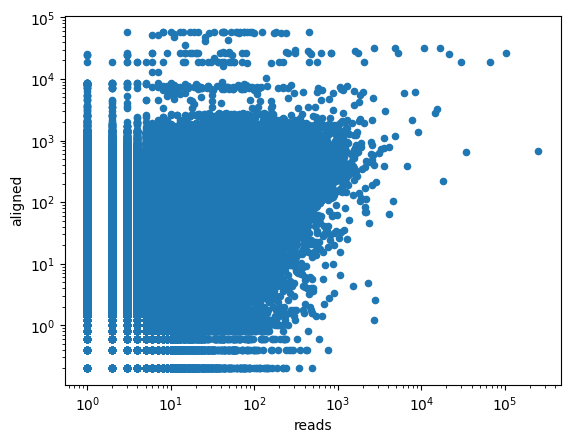

In [30]:
table.plot.scatter(x="reads",y="aligned", logx=True, logy=True)

In [31]:
max(table["aligned"])

57073.0

In [32]:
s = table["value"] - table["aligned"]

<Axes: ylabel='Frequency'>

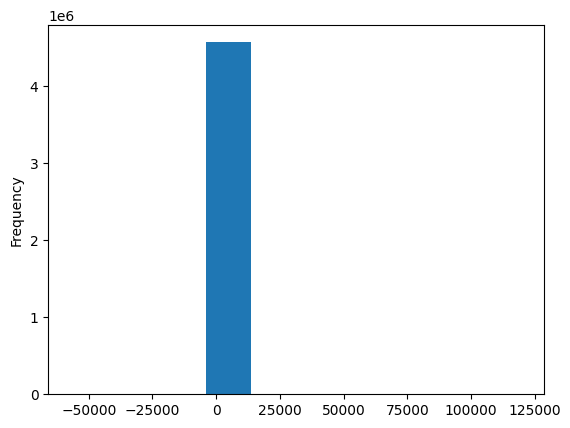

In [33]:
s.plot.hist()

<Axes: >

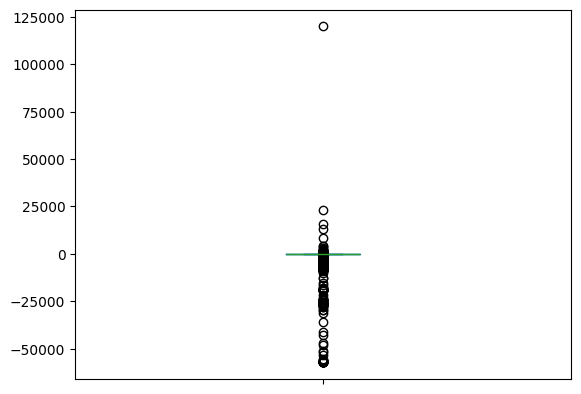

In [34]:
s.plot.box()